In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import kagglehub
import os

In [32]:
path = kagglehub.dataset_download("odedgolden/movielens-1m-dataset")
movies_path = os.path.join(path, "movies.dat")
ratings_path = os.path.join(path, "ratings.dat")
users_path = os.path.join(path, "users.dat")

In [33]:
df_movies = pd.read_csv(movies_path, sep="::", engine="python", encoding="ISO-8859-1", names=["movie_id", "title", "genres"])
df_ratings = pd.read_csv(ratings_path,sep="::", engine="python", encoding="ISO-8859-1", names=["user_id", "movie_id", "rating", "timestamp"])
df_users = pd.read_csv(users_path,sep="::", engine="python", encoding="ISO-8859-1", names=["user_id", "gender", "age", "occupation", "zip_code"])

df_meta = pd.read_csv("movies_metadata.csv")

print("Movies DataFrame Preview:")
print(df_movies.head())

print("\nRatings DataFrame Preview:")
print(df_ratings.head())

print("\nUsers DataFrame Preview:")
print(df_users.head())

print("\nMetadata DataFrame Preview:")
print(df_meta.head())

Movies DataFrame Preview:
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

Ratings DataFrame Preview:
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

Users DataFrame Preview:
   user_id gender  age  occupation zip_code
0        1      F    1          10    48067
1        2      M   56          16    70072
2        3      M   25          15    55117
3        4      M   45           7  

In [34]:
# # Set visual style
# sns.set(style="whitegrid")

<ipython-input-36-639e8cd42a82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratings_count, x='rating', y='count', palette='Blues', width=0.7)


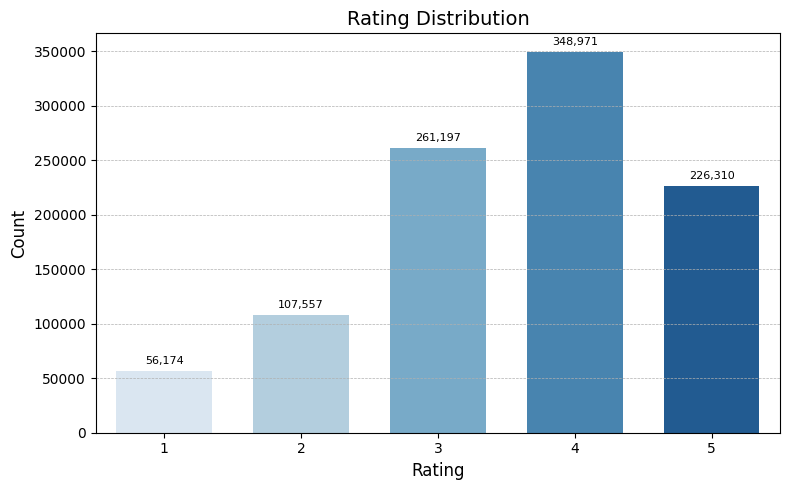

In [36]:
# First, count number of ratings per rating value
ratings_count = df_ratings['rating'].value_counts().sort_index().reset_index()
ratings_count.columns = ['rating', 'count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=ratings_count, x='rating', y='count', palette='Blues', width=0.7)

# Add count labels above each bar
for index, row in ratings_count.iterrows():
    plt.text(x=index, y=row['count'] + 5000, s=f"{row['count']:,}", ha='center', va='bottom', fontsize=8)

plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [37]:
df_ratings = df_ratings[df_ratings['rating'] >= 4]
user_counts = df_ratings['user_id'].value_counts()
item_counts = df_ratings['movie_id'].value_counts()

print("User interaction percentiles:")
print(user_counts.describe(percentiles=[.25, .5, .75, .9, .95, .99]))

print("\nItem interaction percentiles:")
print(item_counts.describe(percentiles=[.25, .5, .75, .9, .95, .99]))

User interaction percentiles:
count    6038.000000
mean       95.276747
std       105.005005
min         1.000000
25%        27.000000
50%        58.000000
75%       124.000000
90%       225.000000
95%       299.150000
99%       494.520000
max      1435.000000
Name: count, dtype: float64

Item interaction percentiles:
count    3533.000000
mean      162.830739
std       285.798512
min         1.000000
25%        13.000000
50%        49.000000
75%       183.000000
90%       457.000000
95%       691.400000
99%      1440.800000
max      2853.000000
Name: count, dtype: float64


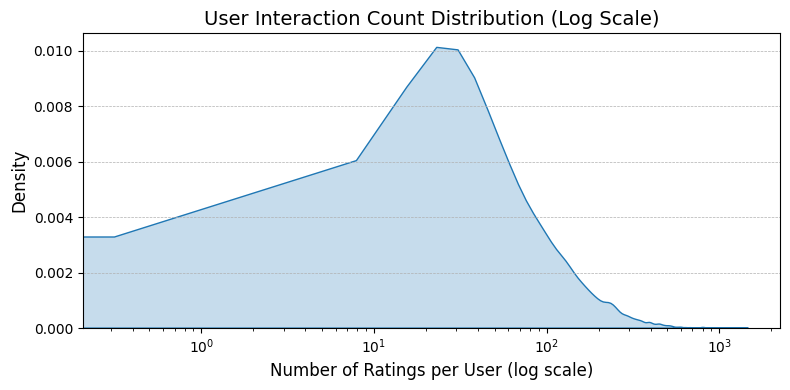

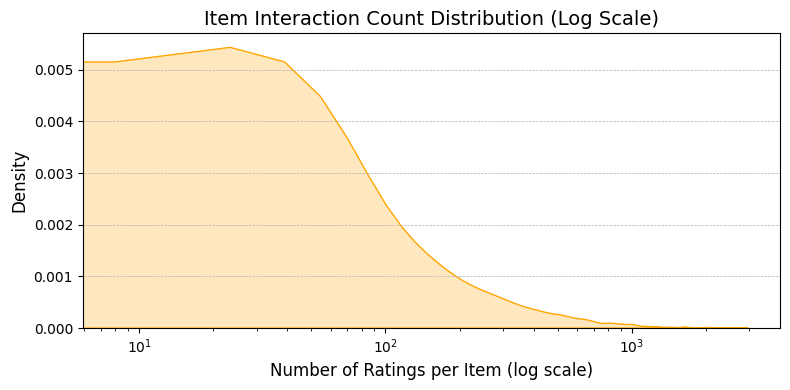

In [38]:
# --- KDE plot for user interactions ---
plt.figure(figsize=(8, 4))
sns.kdeplot(user_counts, fill=True, bw_adjust=0.7)
plt.xscale('log')
plt.title("User Interaction Count Distribution (Log Scale)", fontsize=14)
plt.xlabel("Number of Ratings per User (log scale)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# --- KDE plot for item interactions ---
plt.figure(figsize=(8, 4))
sns.kdeplot(item_counts, fill=True, color="orange", bw_adjust=0.7)
plt.xscale('log')
plt.title("Item Interaction Count Distribution (Log Scale)", fontsize=14)
plt.xlabel("Number of Ratings per Item (log scale)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Metadata

<ipython-input-40-916a144e8ef7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='Greens_r')


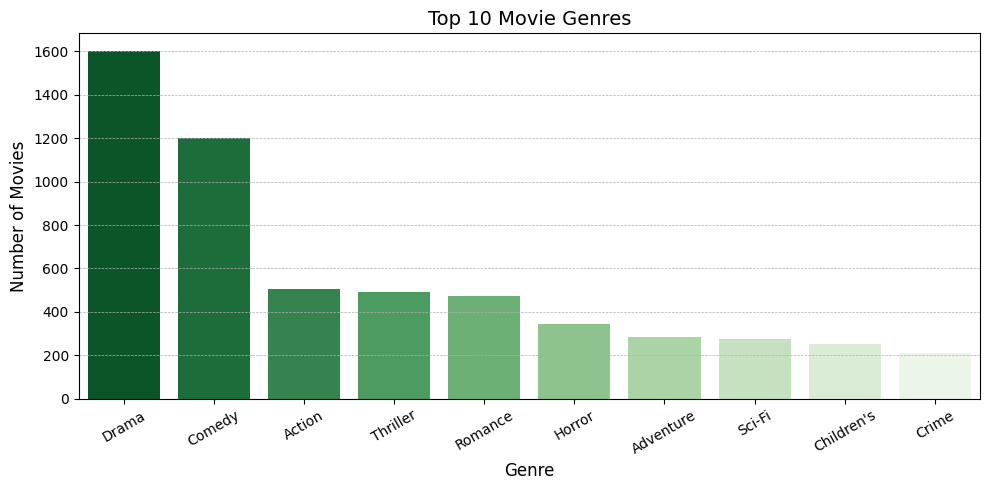

In [40]:
# Expand genres: split by '|'
all_genres = df_movies['genres'].str.split('|').explode()

# Count frequency of each genre
genre_counts = all_genres.value_counts()


# Genre distribution
top_genres = genre_counts.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Greens_r')
plt.title('Top 10 Movie Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<ipython-input-44-2c4b1007391c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


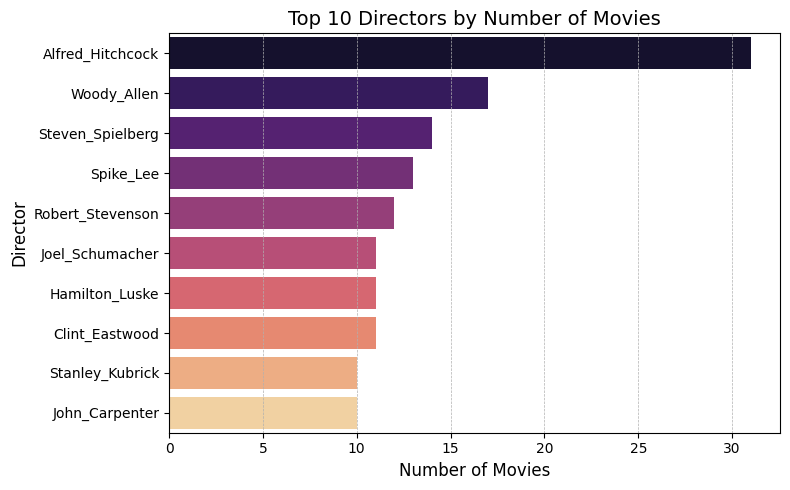

<ipython-input-44-2c4b1007391c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')


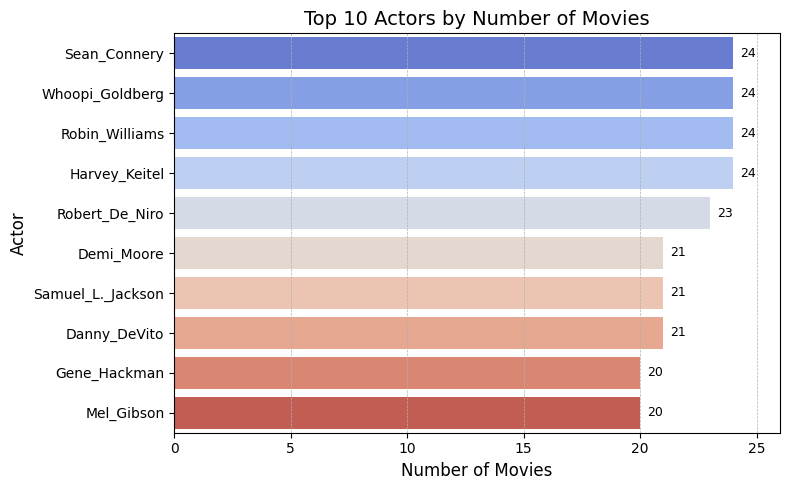

In [44]:
# --- Step 1: Extract and explode directors ---
director_list = df_meta['director'].dropna().str.split('|').explode()

# --- Step 2: Count the top directors ---
top_directors = director_list.value_counts().head(10)

# --- Step 3: Now plot ---
plt.figure(figsize=(8, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors by Number of Movies', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




# Assume you have `df_meta` with 'actor' field combined with '|'

# --- Step 1: Split the combined actors ---
actor_list = df_meta['actor'].dropna().str.split('|').explode()

# --- Step 2: Count top actors ---
top_actors = actor_list.value_counts().head(10)

# --- Step 3: Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')

plt.title('Top 10 Actors by Number of Movies', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.xlim(0, top_actors.values.max() + 2)
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# Optional: add number labels
for i, v in enumerate(top_actors.values):
    plt.text(v + 0.3, i, f"{v:.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()





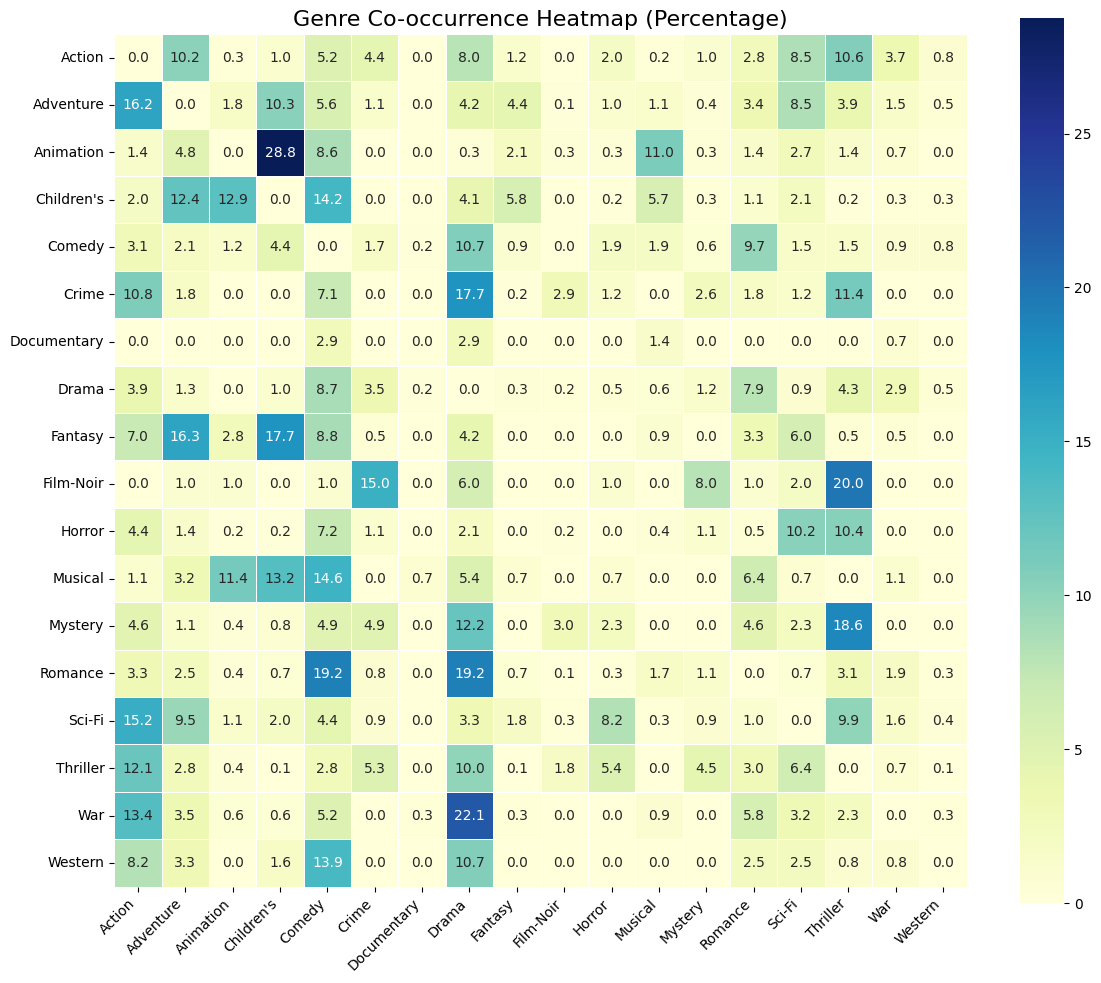

In [43]:
import numpy as np
# --- Step 1: Split genres ---
df_movies['genres_list'] = df_movies['genres'].str.split('|')

# --- Step 2: Create genre set ---
all_genres = sorted(set(g for sublist in df_movies['genres_list'].dropna() for g in sublist))

# --- Step 3: Build raw co-occurrence matrix ---
genre_matrix = pd.DataFrame(0, index=all_genres, columns=all_genres)

for genres in df_movies['genres_list'].dropna():
    for g1 in genres:
        for g2 in genres:
            genre_matrix.loc[g1, g2] += 1

# --- Step 4: Normalise rows to percentages ---
genre_percentage = genre_matrix.div(genre_matrix.sum(axis=1), axis=0) * 100

# --- Optional: zero out diagonal (self-cooccurrence) ---
np.fill_diagonal(genre_percentage.values, 0)

# --- Step 5: Plot percentage heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(genre_percentage, cmap="YlGnBu", linewidths=0.5, square=True, annot=True, fmt=".1f")
plt.title('Genre Co-occurrence Heatmap (Percentage)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()